In [207]:
# Importing the libraries

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import re
import seaborn as sns
import nltk



In [208]:
#Loading the dataset
data = pd.read_csv('Tourist_accommodation_reviews.csv', encoding='cp1252')

In [70]:
data.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...


In [71]:
data['Location'].unique()

array([' Kathu', ' Kata Beach', ' Rawai', ' Choeng Thale', ' Karon Beach',
       ' Phuket Town', ' Patong', ' Mai Khao', ' Karon', ' Chalong',
       ' Nai Harn', ' Cape Panwa', ' Sakhu', ' Pa Khlok', ' Kamala',
       ' Bang Tao Beach', ' Thalang District', ' Talat Nuea',
       ' Kata Noi Beach', ' Wichit', ' Nai Yang', ' Talat Yai',
       ' Koh Kaew', ' Nai Thon', ' Ratsada'], dtype=object)

In [222]:
data = data.groupby(['Location']).Review.nunique()
data_store

Location
 Bang Tao Beach        600
 Cape Panwa           1500
 Chalong              1197
 Choeng Thale         3218
 Kamala               2930
 Karon                5295
 Karon Beach           367
 Kata Beach           5433
 Kata Noi Beach        200
 Kathu                1018
 Koh Kaew              293
 Mai Khao             2242
 Nai Harn              801
 Nai Thon               84
 Nai Yang              986
 Pa Khlok              100
 Patong              15111
 Phuket Town          3126
 Ratsada                88
 Rawai                3471
 Sakhu                  61
 Talat Nuea             77
 Talat Yai             300
 Thalang District     1066
 Wichit                375
Name: Review, dtype: int64

In [74]:
pd.DataFrame(data)

,ID,Review Date,Location,Hotel/Restaurant name,Review
0,rn579778340,Reviewed 1 week ago,Kathu,Thong Dee The Kathu Brasserie,Just been for sunday roast lamb and beef truly...
1,rn576350875,Reviewed 3 weeks ago,Kathu,Thong Dee The Kathu Brasserie,"Quietly set off the main road, nice atmosphere..."
2,rn574921678,Reviewed 4 weeks ago,Kathu,Thong Dee The Kathu Brasserie,I made a reservation for a birthday two days i...
3,rn572905503,"Reviewed April 12, 2018",Kathu,Thong Dee The Kathu Brasserie,We visit here regularly and never fail to be i...
4,rn572364712,"Reviewed April 10, 2018",Kathu,Thong Dee The Kathu Brasserie,Visited this wonderful place on my travels and...
...,...,...,...,...,...
53639,rn162368197,"Reviewed May 29, 2013",Patong,Bite in,"I love this small restaurant, for the great fo..."
53640,rn161843734,"Reviewed May 25, 2013",Patong,Bite in,We stopped at this restaurant after shopping a...
53641,rn161734077,"Reviewed May 24, 2013",Patong,Bite in,"Great times ,This is one of the best restauran..."
53642,rn161218072,"Reviewed May 19, 2013",Patong,Bite in,"Bite in, it has become my favorite restaurant ..."


In [216]:
var1 = data.var()
data.sort_values(['Location'], inplace=True)
filter_data = data['Location'] == ' Karon Beach'
data.where(filter_data, inplace=True)


In [217]:
place = data.dropna()

In [218]:
place

,ID,Review Date,Location,Hotel/Restaurant name,Review
23038,rn549130523,"Reviewed December 25, 2017",Karon Beach,On The Rocks - Marina Phuket Resort,If you want to have a special and very nice di...
23037,rn549974720,"Reviewed December 29, 2017",Karon Beach,On The Rocks - Marina Phuket Resort,We went for the view but were really surprised...
23036,rn551182657,"Reviewed January 3, 2018",Karon Beach,On The Rocks - Marina Phuket Resort,Amazing restaurant beautifully situated om the...
23035,rn551980480,"Reviewed January 6, 2018",Karon Beach,On The Rocks - Marina Phuket Resort,We dined here 3 times and thoroughly enjoyed e...
23034,rn552138074,"Reviewed January 6, 2018",Karon Beach,On The Rocks - Marina Phuket Resort,Food was 2 out of 5. Poor thai food - very oil...
...,...,...,...,...,...
566,rn555747400,"Reviewed January 22, 2018",Karon Beach,EAT. bar & grill,went there with colleague for dinner. we had g...
565,rn557062077,"Reviewed January 29, 2018",Karon Beach,EAT. bar & grill,"Great garlic bread, burger was very juicy, tas..."
564,rn557083535,"Reviewed January 29, 2018",Karon Beach,EAT. bar & grill,This restaurant is truly amazing if you are a ...
563,rn557254978,"Reviewed January 29, 2018",Karon Beach,EAT. bar & grill,Great food and service. Had an Angus burger. G...


In [219]:
Location_order= place.groupby(['Hotel/Restaurant name']).Review.nunique()
Location_order

Hotel/Restaurant name
EAT. bar & grill                       100
MaMa Jin Restaurant                    100
On The Rocks - Marina Phuket Resort    100
Veranda                                 67
Name: Review, dtype: int64

In [223]:
d_hotel = Location_order.nlargest(30)
d_hotel

Hotel/Restaurant name
EAT. bar & grill                       100
MaMa Jin Restaurant                    100
On The Rocks - Marina Phuket Resort    100
Veranda                                 67
Name: Review, dtype: int64

In [221]:
finalreport =list(d_hotel.index)
finalreport

['EAT. bar & grill',
 'MaMa Jin Restaurant',
 'On The Rocks - Marina Phuket Resort',
 'Veranda']

In [87]:
Hotels = data[data['Hotel/Restaurant name'].isin(finalreport)]
Hotels

,ID,Review Date,Location,Hotel/Restaurant name,Review
493,rn581330980,Reviewed yesterday,Karon Beach,EAT. bar & grill,I was excited to finally come here and try the...
23023,rn559026768,"Reviewed February 7, 2018",Karon Beach,On The Rocks - Marina Phuket Resort,We came here for 4 times - absolutely in loved...
23033,rn552351403,"Reviewed January 7, 2018",Karon Beach,On The Rocks - Marina Phuket Resort,Pre booked a table as reviews looked good. Its...
23034,rn552138074,"Reviewed January 6, 2018",Karon Beach,On The Rocks - Marina Phuket Resort,Food was 2 out of 5. Poor thai food - very oil...
23035,rn551980480,"Reviewed January 6, 2018",Karon Beach,On The Rocks - Marina Phuket Resort,We dined here 3 times and thoroughly enjoyed e...
...,...,...,...,...,...
576,rn553069651,"Reviewed January 10, 2018",Karon Beach,EAT. bar & grill,Spotless delivery straight through - we are de...
568,rn555493502,"Reviewed January 22, 2018",Karon Beach,EAT. bar & grill,"Tuna for starter, chateaubriand for dinner, ch..."
23099,rn480754401,"Reviewed May 1, 2017",Karon Beach,On The Rocks - Marina Phuket Resort,"Had a nice meal with family and friends, beaut..."
552,rn561386733,"Reviewed February 18, 2018",Karon Beach,EAT. bar & grill,"Fantastic meal, an owner who genuinely cares a..."


In [88]:
nltk.download(['stopwords','punkt','wordnet','omw-1.4','vader_lexicon'])
get_ipython().run_line_magic('matplotlib', 'inline')


[nltk_data] Downloading package stopwords to
[nltk_data]     C:\Users\catch\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping corpora\stopwords.zip.
[nltk_data] Downloading package punkt to
[nltk_data]     C:\Users\catch\AppData\Roaming\nltk_data...
[nltk_data]   Unzipping tokenizers\punkt.zip.
[nltk_data] Downloading package wordnet to
[nltk_data]     C:\Users\catch\AppData\Roaming\nltk_data...
[nltk_data] Downloading package omw-1.4 to
[nltk_data]     C:\Users\catch\AppData\Roaming\nltk_data...
[nltk_data] Downloading package vader_lexicon to
[nltk_data]     C:\Users\catch\AppData\Roaming\nltk_data...


In [89]:
st_words = nltk.corpus.stopwords.words('english')
print(st_words)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'no', 'nor', 'not', 'only', 'own', 'same', 'so', 'than', '

In [90]:
def preprocess_text(text):
    tk_document = nltk.tokenize.RegexpTokenizer('[a-zA-Z0-9\']+').tokenize(text)
    cl_tokens = [word.lower() for word in tk_document if word.lower() not in st_words]
    st_text = [nltk.stem.PorterStemmer().stem(word) for word in cl_tokens]
    return st_text


In [224]:
from nltk.sentiment.vader import SentimentIntensityAnalyzer
sentiment = SentimentIntensityAnalyzer()


In [173]:
Hotels['neg']= Hotels['Review'].apply(lambda x:sentiment.polarity_scores(x)['neg'])
Hotels['neu']= Hotels['Review'].apply(lambda x:sentiment.polarity_scores(x)['neu'])
Hotels['pos']= Hotels['Review'].apply(lambda x:sentiment.polarity_scores(x)['pos'])
Hotels['compound']= Hotels['Review'].apply(lambda x:sentiment.polarity_scores(x)['compound'])

In [174]:
Hotels[['compound','neg','neu','pos']].describe()

,compound,neg,neu,pos
count,397.000000,397.000000,397.000000,397.000000
mean,0.666339,0.028514,0.731945,0.239549
std,0.451535,0.060700,0.123872,0.133279
min,-0.932100,0.000000,0.331000,0.000000
25%,0.646400,0.000000,0.647000,0.140000
50%,0.855500,0.000000,0.743000,0.234000
75%,0.927200,0.038000,0.821000,0.331000
max,0.985400,0.365000,1.000000,0.669000


<AxesSubplot:xlabel='compound', ylabel='Count'>

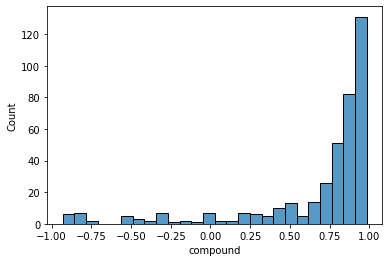

In [175]:
sns.histplot(Hotels['compound'])

<AxesSubplot:xlabel='pos', ylabel='Count'>

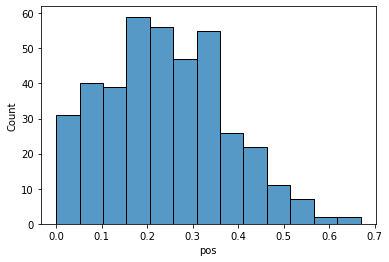

In [176]:
sns.histplot(Hotels['pos'])

<AxesSubplot:xlabel='neg', ylabel='Count'>

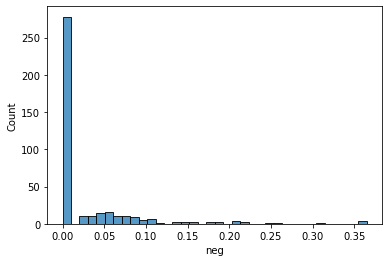

In [177]:
sns.histplot(Hotels['neg'])

<AxesSubplot:xlabel='neu', ylabel='Count'>

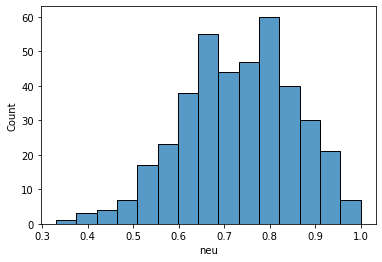

In [178]:
sns.histplot(Hotels['neu'])

In [179]:
(Hotels['compound']<=0).groupby(Hotels['Hotel/Restaurant name']).sum()

Hotel/Restaurant name
EAT. bar & grill                        4
MaMa Jin Restaurant                     6
On The Rocks - Marina Phuket Resort     9
Veranda                                22
Name: compound, dtype: int64

In [180]:
negative = pd.DataFrame((Hotels['compound']<=0).groupby(Hotels['Hotel/Restaurant name']).sum()
                               /Hotels['Hotel/Restaurant name'].groupby(Hotels['Hotel/Restaurant name']).count()*100,
                               columns=['% negative reviews']).sort_values(by='% negative reviews')
negative

,% negative reviews
Hotel/Restaurant name,
EAT. bar & grill,4.000000
MaMa Jin Restaurant,6.000000
On The Rocks - Marina Phuket Resort,9.000000
Veranda,22.680412


<AxesSubplot:xlabel='% negative reviews', ylabel='Hotel/Restaurant name'>

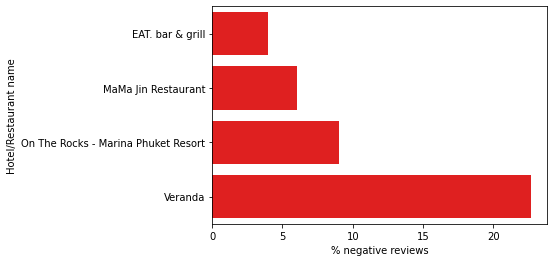

In [184]:
sns.barplot(data=negative, x='% negative reviews', y=negative.index, color='red')

In [187]:
Hotels['processed_review'] = Hotels['Review'].apply(preprocess_text)
p_reviews = Hotels.loc[(Hotels['Hotel/Restaurant name'] == 'Veranda') & (Hotels['compound']>0),:]
n_reviews = Hotels.loc[(Hotels['Hotel/Restaurant name'] == 'Veranda' ) & (Hotels['compound']<=0),:]
n_reviews.head()

,ID,Review Date,Location,Hotel/Restaurant name,Review,neg,neu,pos,compound,processed_review
27507,rn354063931,"Reviewed March 9, 2016",Karon Beach,Veranda,"Arrived to be given menus in Russian, not Engl...",0.073,0.927,0.000,-0.5157,"[arriv, given, menu, russian, english, without..."
27499,rn393362294,"Reviewed July 16, 2016",Karon Beach,Veranda,Not sure how this place has managed to get so ...,0.213,0.694,0.093,-0.7638,"[sure, place, manag, get, mani, good, review, ..."
27488,rn449682768,"Reviewed January 5, 2017",Karon Beach,Veranda,Walked in on a moderately busy night. Was not ...,0.208,0.792,0.000,-0.8158,"[walk, moder, busi, night, serv, 40, minut, en..."
27509,rn346993963,"Reviewed February 11, 2016",Karon Beach,Veranda,This is an odd restaurant... you walk up some ...,0.121,0.879,0.000,-0.5423,"[odd, restaur, walk, reason, high, step, front..."
27516,rn335016228,"Reviewed December 26, 2015",Karon Beach,Veranda,This is a restaurant owned/managed by Russians...,0.052,0.948,0.000,-0.3071,"[restaur, own, manag, russian, direct, toward,..."


In [209]:
!pip3 install wordcloud

In [211]:
from wordcloud import WordCloud

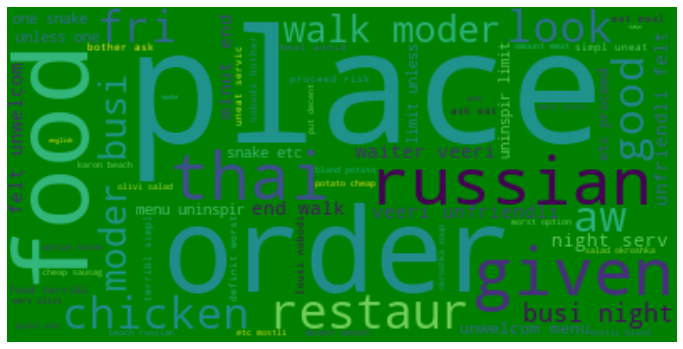

In [215]:
neg_tokens = [word for review in n_reviews['processed_review'] for word in review]
wordcloud= WordCloud(background_color='green').generate_from_text(' '.join(neg_tokens))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()

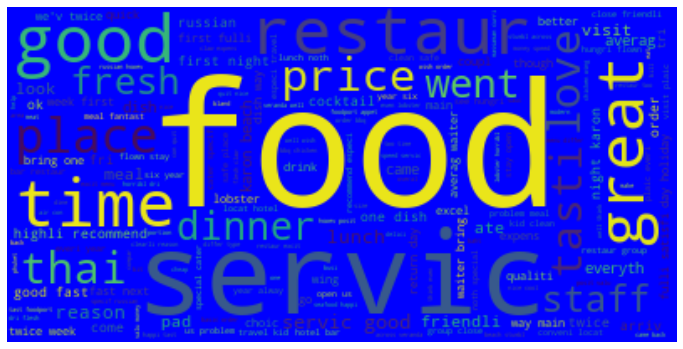

In [214]:
pos_tokens = [word for review in p_reviews['processed_review'] for word in review]
wordcloud= WordCloud(background_color='blue').generate_from_text(' '.join(pos_tokens))
plt.figure(figsize=(12,12))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.show()